# Syllable Segmentation Example

## Preliminaries

In [89]:
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from pathlib import Path
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append(str(Path("..")/"utils"))

import theta_oscillator

## Data

In [91]:
wav_fn = "brent_01.wav"
wav, fs = librosa.load(wav_fn, sr=16000)

In [92]:
import IPython
IPython.display.Audio(wav, rate=fs)

## Syllable boundary detection

In [96]:
boundaries, outh = theta_oscillator.get_boundaries(
    wav_fn, return_outh=True
    )

Text(0.5, 0, 'Time (s)')

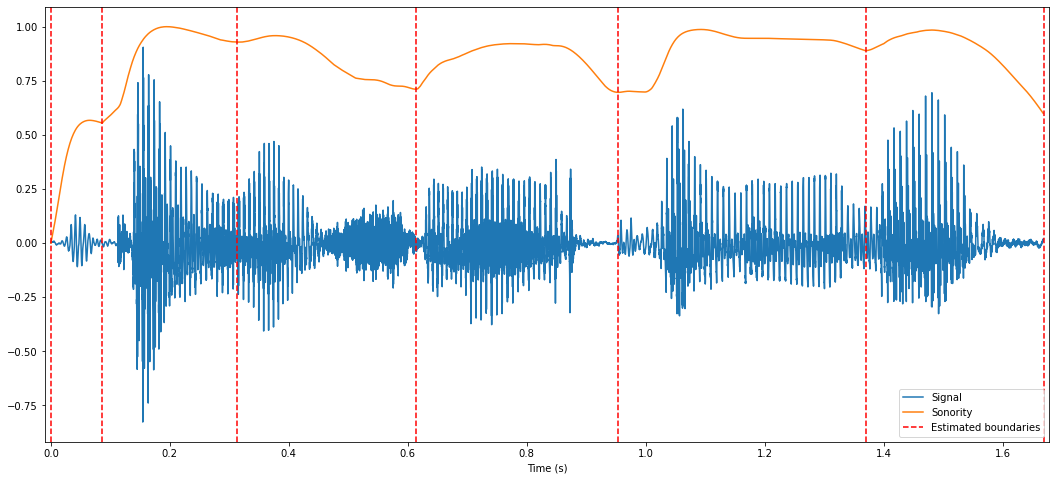

In [97]:
# Plot the results
plt.figure(figsize=(18, 8))
plt.plot(np.arange(len(wav))/fs, wav)
plt.xlim([-0.01, (len(wav))/fs + 0.01])
plt.plot(np.arange(len(outh))/1000, outh)

for bound_t in boundaries:
    plt.axvline(bound_t, ymin=0, ymax=1, color="r", linestyle="dashed")
    
plt.legend(["Signal", "Sonority", "Estimated boundaries"])
plt.xlabel ("Time (s)")

In [98]:
# Split the audio
pause_t = 0.5
prev_sample = 0
wav_split = []
for bound_t in boundaries[1:]:
    cur_sampled = int(bound_t*fs)
    wav_split.append(wav[prev_sample:cur_sampled])
    wav_split.append(np.zeros(int(pause_t*fs)))
    prev_sample = cur_sampled
wav_split = np.hstack(wav_split)

In [99]:
# Original
IPython.display.Audio(wav, rate=fs)

In [100]:
# Split
IPython.display.Audio(wav_split, rate=fs)